In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
train=pd.read_csv(r'C:\Users\Personal\Downloads\train.csv')
test=pd.read_csv(r'C:\Users\Personal\Downloads\test.csv')


## Exploratory Data Analysis

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.shape

(891, 12)

In [20]:
test.shape

(418, 11)

In [21]:
# Merging both train and test dataset for EDA
train['test_data'] = 0
test['test_data'] = 1
test['Survived'] = np.NaN

df = pd.concat(objs=[train, test])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  test_data    1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [23]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test_data         0
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
test_data,1309.0,0.319328,0.466394,0.00,0.0000,0.0000,1.000,1.0000


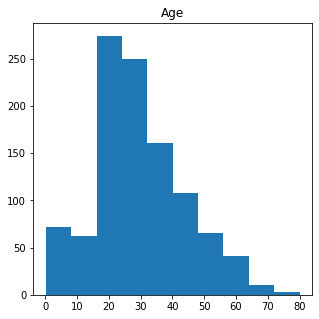

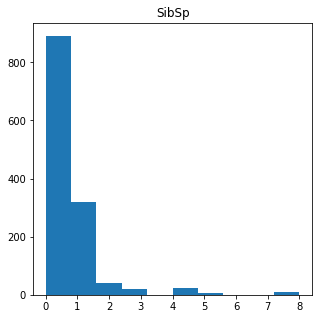

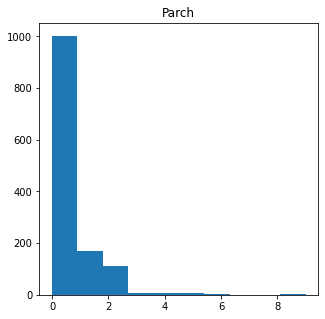

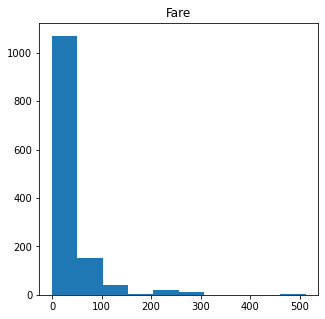

In [28]:
# Plotting histograms for numeric features to understand distributions
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']
for column in numeric_columns:
 plt.figure(figsize=(5,5))
 plt.hist(df[column])
 plt.title(column)
 plt.show()

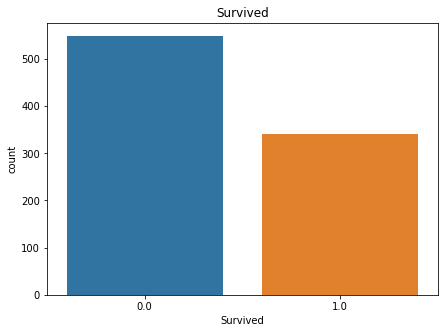

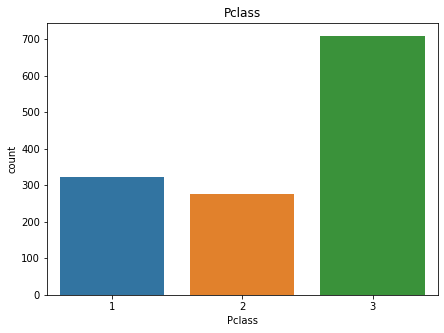

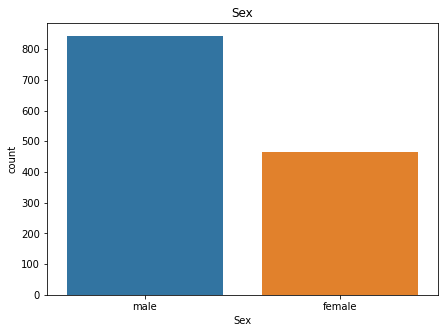

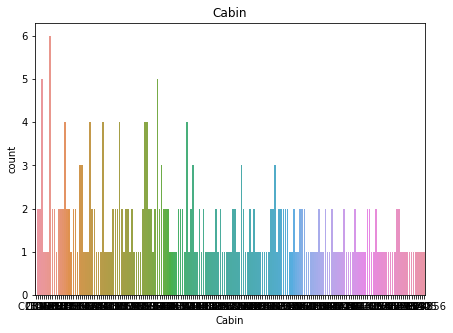

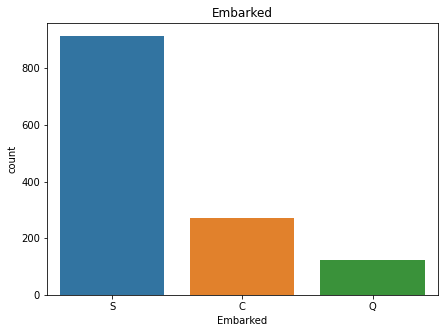

In [26]:
# Plotting countplots for categorical features
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']
for column in categorical_columns:
  plt.figure(figsize=(7,5))
  sns.countplot(x=df[column])
  plt.title(column)
  plt.show()

In [34]:
# How Titanic ship sank?
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg")

In [35]:
def bar_chart(feature):
  survived = df[(df.test_data == 0) & (df['Survived'] == 1)][feature].value_counts()
  dead = df[(df.test_data == 0) & (df['Survived'] == 0)][feature].value_counts()
  temp_df = pd.DataFrame([survived,dead])
  temp_df.index = ['Survived','Dead']
  temp_df.plot(kind='bar', stacked=True, figsize=(10,5))

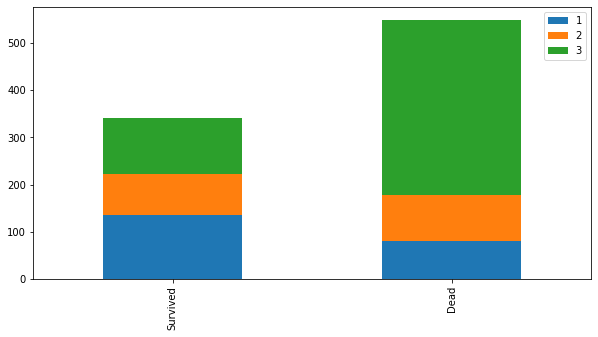

In [36]:
bar_chart('Pclass')

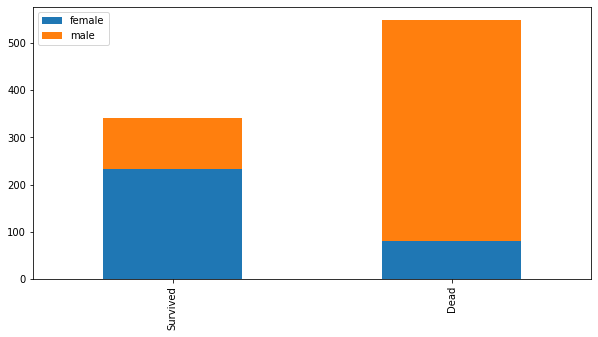

In [37]:
bar_chart('Sex')

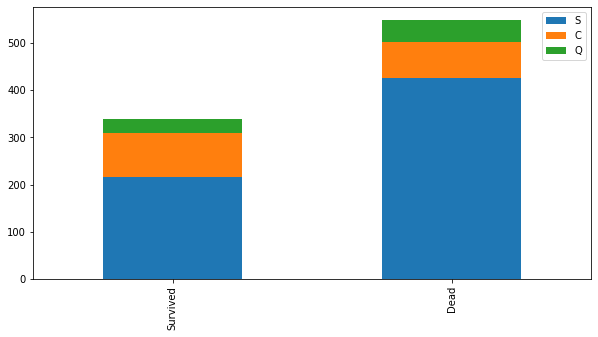

In [38]:
bar_chart('Embarked')

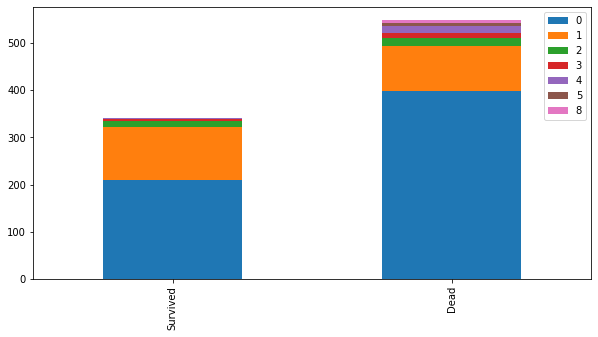

In [39]:
bar_chart('SibSp')

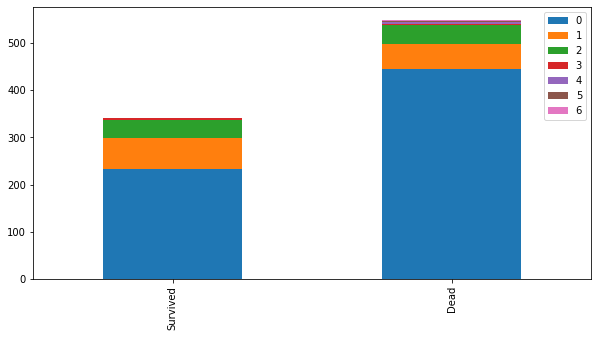

In [40]:
bar_chart('Parch')

## Feature Engineering

In [41]:
# Creating a new column of 'name_title' from 'Name' feature
# Sample name: Braund, Mr. Owen Harris
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Dona              1
Don               1
Lady              1
Mme               1
the Countess      1
Jonkheer          1
Capt              1
Sir               1
Name: name_title, dtype: int64

In [42]:
most_frequent_titles = ['Mr', 'Miss', 'Mrs', 'Master'] 
df['name_title'] = df['name_title'].apply(lambda x: x if x in most_frequent_titles else 'Other')
df['name_title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: name_title, dtype: int64

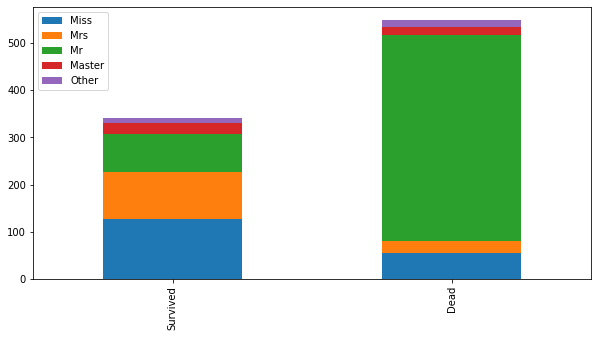

In [43]:
bar_chart('name_title')

In [44]:
# Creating a new column of 'cabin_init' from 'Cabin' feature assuming same initials are clustered togeather
# Sample Cabin: C23
df['cabin_init'] = df['Cabin'].apply(lambda x: str(x)[0])
df['cabin_init'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_init, dtype: int64

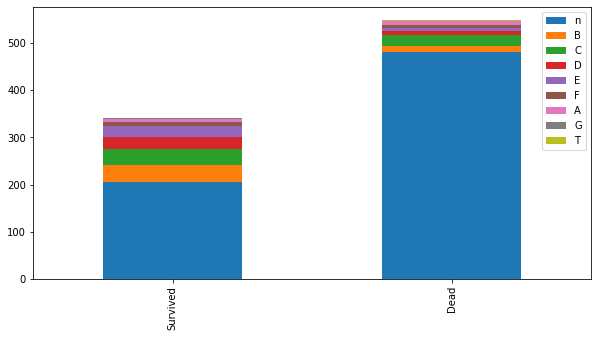

In [45]:
bar_chart('cabin_init')

In [46]:
# Creating a new column of 'ticket_numeric' from 'Ticket' feature
# Sample Ticket: 112053 and PC 17603
df['ticket_numeric'] = df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_numeric'].value_counts()

1    957
0    352
Name: ticket_numeric, dtype: int64

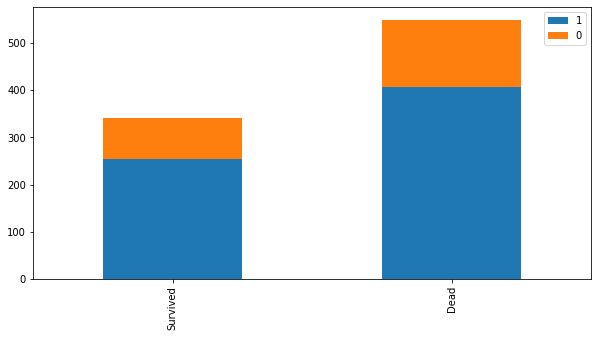

In [47]:
bar_chart('ticket_numeric')

## Data Preprocessing

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_data',
       'name_title', 'cabin_init', 'ticket_numeric'],
      dtype='object')

In [49]:
# Removing column(s) that don't provide any significant insights
print("Before removing the unwanted columns: {}".format(df.shape))
df.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
print("After removing the unwanted columns: {}".format(df.shape))

Before removing the unwanted columns: (1309, 16)
After removing the unwanted columns: (1309, 12)


In [50]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Fare                1
Embarked            2
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

Text(0.5, 1.0, 'Histogram for Age feature')

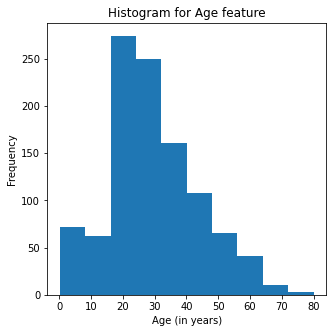

In [51]:
# Plotting histogram for 'Age'
plt.figure(figsize=(5,5))
plt.hist(x=df['Age'], bins=10, histtype='bar', orientation='vertical')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.title('Histogram for Age feature')

Text(0.5, 1.0, 'Histogram for Age feature')

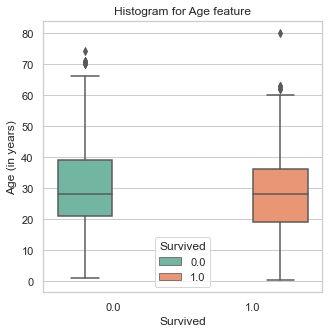

In [52]:
# Plotting boxplot for 'Age'
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette='Set2')
plt.ylabel('Age (in years)')
plt.title('Histogram for Age feature')

In [53]:
# Replacing the NaN values by median of the 'Age'
print('Number of NaN values before: {}'.format(df['Age'].isnull().sum()))
df['Age'].fillna(df['Age'].median(), inplace=True)
print('Number of NaN values after: {}'.format(df['Age'].isnull().sum()))

Number of NaN values before: 263
Number of NaN values after: 0


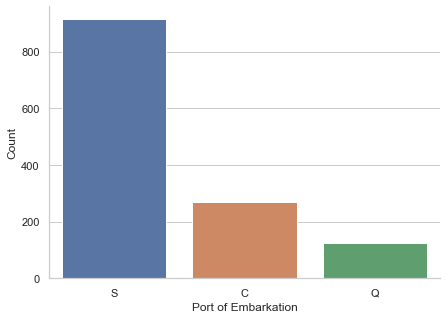

In [54]:
# Plotting countplot for Embarked column
plt.figure(figsize=(7,5))
sns.countplot(x='Embarked', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [55]:
# Using method 2: Replace NaN with most frequent value
print('Number of NaN values before: {}'.format(df['Embarked'].isnull().sum()))
df['Embarked'].fillna('S', inplace=True)
print('Number of NaN values after: {}'.format(df['Embarked'].isnull().sum()))

Number of NaN values before: 2
Number of NaN values after: 0


Text(0.5, 1.0, 'Histogram for Fare feature')

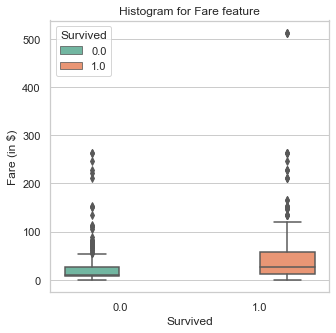

In [56]:
# Plotting boxplot for 'Fare'
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df, palette='Set2')
plt.ylabel('Fare (in $)')
plt.title('Histogram for Fare feature')

In [57]:
# Using meadian to replace NaN value in 'Fare' feature
print('Number of NaN values before: {}'.format(df['Fare'].isnull().sum()))
df['Fare'].fillna(df['Fare'].median(), inplace=True)
print('Number of NaN values after: {}'.format(df['Fare'].isnull().sum()))

Number of NaN values before: 1
Number of NaN values after: 0


In [58]:
df.isnull().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,n,1


In [60]:
# Converting Sex feature from categorical to a binary feature
print('Datatype of Sex feature before: {}'.format(df['Sex'].dtype))
df['Sex'] = df['Sex'].apply(lambda x: 1 if (x=='male') else 0)
print('Datatype of Sex feature after: {}'.format(df['Sex'].dtype))
print('---------------------------------------------')
print('Column name before: {}'.format(df.columns[2]))
df.rename(mapper={'Sex':'Sex_male'}, axis=1, inplace=True)
print('Column name after: {}'.format(df.columns[2]))

Datatype of Sex feature before: object
Datatype of Sex feature after: int64
---------------------------------------------
Column name before: Sex
Column name after: Sex_male


In [61]:
# Converting Embarked column using get_dummies()
print('Shape of df before: {}'.format(df.shape))
df = pd.get_dummies(data=df, columns=['Embarked', 'name_title', 'cabin_init'], drop_first=True)
print('Shape of df after: {}'.format(df.shape))

Shape of df before: (1309, 12)
Shape of df after: (1309, 23)


## Feature Selection

In [62]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
temp_X_train = df[df['test_data']==0].drop(['Survived'], axis=1)
temp_y_train = df[df['test_data']==0]['Survived']
etc = ExtraTreesClassifier()
etc.fit(temp_X_train, temp_y_train)

ExtraTreesClassifier()

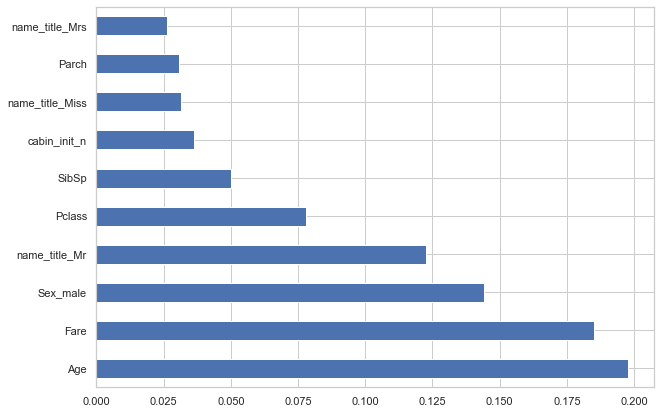

In [63]:
plt.figure(figsize=(10,7))
feature_score = pd.Series(etc.feature_importances_, index=temp_X_train.columns)
feature_score.nlargest(10).plot(kind='barh')
plt.show()

In [64]:
feature_score.nlargest(10).index

Index(['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
       'cabin_init_n', 'name_title_Miss', 'Parch', 'name_title_Mrs'],
      dtype='object')

In [65]:
# Selecting top 10 features
df_important_features = df[['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
                            'cabin_init_n', 'Parch', 'name_title_Mrs', 'name_title_Miss', 'Survived', 'test_data']]

In [66]:
df_important_features.columns

Index(['Age', 'Fare', 'Sex_male', 'name_title_Mr', 'Pclass', 'SibSp',
       'cabin_init_n', 'Parch', 'name_title_Mrs', 'name_title_Miss',
       'Survived', 'test_data'],
      dtype='object')

In [67]:
# Splitting the dataset into train set and test set
X_train = df_important_features[df_important_features['test_data']==0].drop(['Survived'], axis=1)
X_train.drop(['test_data'], axis=1, inplace=True)
y_train = df_important_features[df_important_features['test_data']==0]['Survived']
X_test = df_important_features[df_important_features['test_data']==1].drop(['Survived'], axis=1)
X_test.drop(['test_data'], axis=1, inplace=True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (891, 10), X_test size: (418, 10)


In [68]:
# Feature Scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Model Building

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.8202% ---
Scores for each cycle: [0.8        0.85393258 0.75280899 0.79775281 0.83146067 0.82022472
 0.83146067 0.79775281 0.85393258 0.84269663]


In [71]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.8165% ---
Scores for each cycle: [0.83333333 0.82022472 0.75280899 0.85393258 0.82022472 0.76404494
 0.84269663 0.82022472 0.83146067 0.84269663]


In [72]:
# Fitting Support Vector Machine to the Training set
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 82.829% ---
Scores for each cycle: [0.82222222 0.87640449 0.76404494 0.87640449 0.84269663 0.7752809
 0.82022472 0.79775281 0.85393258 0.85393258]


In [73]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 78.9064% ---
Scores for each cycle: [0.73333333 0.79775281 0.66292135 0.75280899 0.86516854 0.84269663
 0.78651685 0.76404494 0.85393258 0.83146067]


In [74]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.7166% ---
Scores for each cycle: [0.72222222 0.84269663 0.71910112 0.85393258 0.84269663 0.87640449
 0.79775281 0.78651685 0.87640449 0.85393258]


In [75]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--- Average Accuracy: 81.7091% ---
Scores for each cycle: [0.78888889 0.83146067 0.71910112 0.80898876 0.87640449 0.87640449
 0.83146067 0.76404494 0.86516854 0.80898876]


In [76]:
# Fitting VotingClassifier to the Training set
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators = [('xgb',xgb), ('svc',svc), ('lr',lr), ('knn',knn), ('rf',rf)], voting = 'soft') 
cv = cross_val_score(vt, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Personal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--- Average Accuracy: 83.6155% ---
Scores for each cycle: [0.82222222 0.86516854 0.75280899 0.85393258 0.85393258 0.83146067
 0.83146067 0.80898876 0.87640449 0.86516854]
